## File Processing

### 1. Videos Scanning & SQL Storing

In [1]:
## PostGreSQL
from postgre_conn import PostgresDB
PASSWORD="PixelFlow"
PGDB = PostgresDB(PASSWORD)
# if not PGDB.check_table_exists('video'):
#     PGDB.create_video_table()
# if not PGDB.check_table_exists('frame'):
#     PGDB.create_frame_table()
# if not PGDB.check_table_exists('btc_frame'):
#     PGDB.create_btc_frame_table()

PostgreSQL connection established.


In [15]:
frame = PGDB.fetch_frame_by_id('0ed1477e-022e-4dba-9ca8-e87441b822a4', table_name='btc_frame')
print(frame)
print(type(frame[5]))
frame[5]

('0ed1477e-022e-4dba-9ca8-e87441b822a4', '6548757a-3613-4598-9083-03abe900ed87', 208, '/kaggle/input/pf-data-frames/Keyframes_L21/keyframes/L21_V017/208.jpg', 'https://storage.googleapis.com/hcmai25/Keyframes_L21/L21_V017/208.webp', '{"06:58:54 HD","Giải đua mô tô Việt Nam Grand Prix","Olympic Paris"}', '{"person": {"count": 12, "detections": [{"score": 0.8954150080680847, "bbox": [555.413818359375, 201.7562255859375, 725.2222900390625, 652.3463134765625]}, {"score": 0.8512844443321228, "bbox": [1058.558349609375, 127.68511962890625, 1156.480224609375, 507.44873046875]}, {"score": 0.8370192050933838, "bbox": [698.1452026367188, 189.41014099121094, 819.5682983398438, 589.9267578125]}, {"score": 0.7778096199035645, "bbox": [491.43463134765625, 222.50726318359375, 582.7343139648438, 530.2780151367188]}, {"score": 0.7471027374267578, "bbox": [214.22137451171875, 143.89724731445312, 288.7420654296875, 381.5683288574219]}, {"score": 0.7202250957489014, "bbox": [920.0562744140625, 176.0187988

'{"06:58:54 HD","Giải đua mô tô Việt Nam Grand Prix","Olympic Paris"}'

In [17]:
import re
def clean_text(raw: str) -> str:
    # Remove curly braces, quotes, and commas
    cleaned = re.sub(r'[{}"\']', '', raw)
    # Normalize extra spaces
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    cleaned = re.sub(r',+', ',', cleaned)
    cleaned = cleaned.replace(',', ', ')
    cleaned = cleaned.replace('  ', ' ')
    return cleaned

frame_id = "a0396b32-6271-45b6-9e6e-b5c1ec09e642"
frame = PGDB.fetch_frame_by_id(frame_id, table_name='btc_frame')
frame_ocr = clean_text(str(frame[5])) if frame[5] else ''
frame_desc = clean_text(str(frame[8])) if frame[8] else ''
print(frame_ocr)
print(frame_desc)


HTV Online, ĐÔI MẮT MEKONG
Hình ảnh cho thấy một số miếng thịt đã được làm khô, có thể là mực hoặc tương ớt. Chúng được đặt trên một chiếc đĩa tre.


In [2]:
len(PGDB.fetch_all_clip())

177321

In [3]:
frame_id = "3bd4c9ce-c8f7-4fd1-8f66-f8febed66ac5"
PGDB.fetch_frame_by_id(frame_id, table_name='btc_frame')

('3bd4c9ce-c8f7-4fd1-8f66-f8febed66ac5',
 '2c05382f-bceb-4b48-87ef-89178b808b4e',
 270,
 '/kaggle/input/pf-data-frames/Keyframes_L21/keyframes/L21_V001/270.jpg',
 'https://storage.googleapis.com/hcmai25/Keyframes_L21/L21_V001/270.webp',
 '{HTV9,"06:52:37 HD","doanh nghiệp bán hàng trực tuyến có dấu hiệu trốn thuế","TP.HCM: tiếp tục xét xử vụ án xảy"}',
 '{"person": {"count": 4, "detections": [{"score": 0.9338078498840332, "bbox": [627.9346923828125, 49.4443359375, 1159.0377197265625, 583.433837890625]}, {"score": 0.7510225772857666, "bbox": [412.7032775878906, 447.314208984375, 458.5802307128906, 576.09716796875]}, {"score": 0.6126981377601624, "bbox": [344.2174987792969, 446.1282958984375, 387.5970764160156, 578.21923828125]}, {"score": 0.5103805661201477, "bbox": [517.1025390625, 439.73858642578125, 560.297119140625, 568.0735473632812]}]}}',
 None,
 'Ảnh chụp cận cảnh một người đàn ông đeo kính gọng, đang nói chuyện trước bờ biển.  Phía trên cùng bên phải có logo của HTV9 và thời gia

In [ ]:
add_columns = """
#     ALTER TABLE btc_frame
#     ADD COLUMN batch INTEGER DEFAULT 1;
# """
# PGDB.custom_execute(add_columns)

In [6]:
video_names = []
video_ids = []
frame_ids = []

for i in range(1, 31):
    video_names.append(f'L22_V{str(i).zfill(3)}.mp4')

for name in video_names:
    video_id = PGDB.fetch_video_by_name(name)
    if video_id:
        video_ids.append(video_id[0])

# for video_id in ['3bfd9048-e733-413b-8b8f-2c1fe9a61d6e']:
#     frames = PGDB.fetch_frames_by_video_id(video_id, table_name='btc_frame')
#     for frame in frames:
#         frame_ids.append(frame[0])
    
for video_id in video_ids:
    res = PGDB.get_frame_id_where_desc_not_null(video_id)
    if len(res) > 0:
        print(f"Video ID {video_id} has {len(res)} frames with non-null descriptions.")
    else:
        print(f"non-null descriptions.")

# for i, frame_id in enumerate(frame_ids):
#     print(f"Frame {i}: {len(frame_ids)}")
#     PGDB.set_desc_as_null(frame_id, table_name='btc_frame')

non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.
non-null descriptions.


In [6]:
for frame_id in frame_ids[:5]:
    res = PGDB.fetch_frame_by_id(frame_id, table_name='btc_frame')
    print(res)

('3bd4c9ce-c8f7-4fd1-8f66-f8febed66ac5', '2c05382f-bceb-4b48-87ef-89178b808b4e', 270, '/kaggle/input/pf-data-frames/Keyframes_L21/keyframes/L21_V001/270.jpg', 'https://storage.googleapis.com/hcmai25/Keyframes_L21/L21_V001/270.webp', None, '{"person": {"count": 4, "detections": [{"score": 0.9338078498840332, "bbox": [627.9346923828125, 49.4443359375, 1159.0377197265625, 583.433837890625]}, {"score": 0.7510225772857666, "bbox": [412.7032775878906, 447.314208984375, 458.5802307128906, 576.09716796875]}, {"score": 0.6126981377601624, "bbox": [344.2174987792969, 446.1282958984375, 387.5970764160156, 578.21923828125]}, {"score": 0.5103805661201477, "bbox": [517.1025390625, 439.73858642578125, 560.297119140625, 568.0735473632812]}]}}', None, None, None, False, False, None, None, False, True)
('b952a907-102f-41f5-9916-e2903f903232', '2c05382f-bceb-4b48-87ef-89178b808b4e', 190, '/kaggle/input/pf-data-frames/Keyframes_L21/keyframes/L21_V001/190.jpg', 'https://storage.googleapis.com/hcmai25/Keyfr

In [ ]:
res = PGDB.get_frame_id_where_desc_not_null()

In [5]:
from base import DataDirectory, Video

ROOT = '../data/sample/'
video_formats = ['.mp4', '.avi', '.mov', '.mkv']
Data_dir = DataDirectory(ROOT, video_formats=video_formats)
found_videos = Data_dir.search_videos()
print(f"Found {len(found_videos)} videos in '{ROOT}' over {len(Data_dir.files)} files:")
print(found_videos[:5])

print(f"Other files extensions: {Data_dir.non_video_files_ext}")

Video_list = [Video(video_path, ROOT) for video_path in found_videos]
print([video.path for video in Video_list])


Found 3 videos in '../data/sample/' over 182 files:
['./vtv24-3.mp4', 'L02/L021/vtv24-2.mp4', 'L01/vtv24-1.mp4']
Other files extensions: ['.webp']
['./vtv24-3.mp4', 'L02/L021/vtv24-2.mp4', 'L01/vtv24-1.mp4']


In [6]:
# Insert video metadata into the database
for video in Video_list:
    video_data = (
        video.id,
        video.path,
        video.name,
        video.metadata['size'],
        video.metadata['size_mb'],
        video.metadata['format'],
        video.metadata['last_modified'],
        video.metadata['creation_time'],
    )
    PGDB.insert_video(video_data)
print(f"Total videos in database: {PGDB.total_videos()}")

Total videos in database: 3


In [7]:
import pandas as pd
videos = PGDB.fetch_videos()
df_videos = pd.DataFrame(videos, columns=['id', 'path', 'name', 
                                          'size', 'size_mb', 'format', 
                                          'last_modified', 'creation_time',
                                          'processed', 'hold', 'hold_by', 'processed_by'
                                          ])
df_videos.head()

id                  path         name  \
0  7e06706f-9b46-49b9-87b0-e1c869d6086b         ./vtv24-3.mp4  vtv24-3.mp4   
1  8b659095-c313-4739-835e-62084f959ee6  L02/L021/vtv24-2.mp4  vtv24-2.mp4   
2  fd2baad1-3e10-4bd4-869d-181ac90f96f8       L01/vtv24-1.mp4  vtv24-1.mp4   

      size  size_mb format        last_modified        creation_time  \
0  7378714     7.04   .mp4  2025-07-14 21:07:10  2025-07-14 21:07:32   
1  4552985     4.34   .mp4  2025-07-14 21:03:08  2025-08-11 23:12:33   
2  5387705     5.14   .mp4  2025-06-30 23:15:41  2025-08-11 23:12:22   

   processed   hold hold_by processed_by  
0      False  False    None         None  
1      False  False    None         None  
2      False  False    None         None

In [9]:
user = "tuanna" # User requesting video processing
n_videos = 20 # Number of videos to process
ids = PGDB.get_videos_for_processing(user, n_vid=n_videos)
print(f"Videos to process: {ids}")

Videos to process: ['77bb72d2-2297-4617-a50b-66c14a9d2ad6', '727aff1e-de0b-4bc7-a07a-c0b2a7ed203a', '94c641dd-00e7-4950-9b86-ebbf269ca8ea']


In [7]:
import pandas as pd
videos = PGDB.fetch_videos()
df_videos = pd.DataFrame(videos, columns=['id', 'path', 'name', 
                                          'size', 'size_mb', 'format', 
                                          'last_modified', 'creation_time',
                                          'processed', 'hold', 'hold_by', 'processed_by'
                                          ])
df_videos.head()

id                             path  \
0  c81f98de-4092-4ec4-8373-b91d6b0e83d2  Videos_L26_b/video/L26_V191.mp4   
1  ead5ad4a-9b57-4d5c-a423-895936971c97  Videos_L26_b/video/L26_V198.mp4   
2  de1e1339-7c56-4fb4-a247-6b8148718c30  Videos_L26_b/video/L26_V114.mp4   
3  07df4d20-8ba9-45d6-8c49-7ae2260cbcf6  Videos_L26_b/video/L26_V146.mp4   
4  32f02eaf-b0fc-4893-afc1-f5de07186424  Videos_L26_b/video/L26_V149.mp4   

           name      size  size_mb format        last_modified  \
0  L26_V191.mp4  58829214    56.10   .mp4  2025-08-15 06:41:41   
1  L26_V198.mp4  71883796    68.55   .mp4  2025-08-15 06:42:02   
2  L26_V114.mp4  61971446    59.10   .mp4  2025-08-15 06:41:54   
3  L26_V146.mp4  70412550    67.15   .mp4  2025-08-15 06:41:58   
4  L26_V149.mp4  53937030    51.44   .mp4  2025-08-15 06:41:43   

         creation_time  processed   hold hold_by processed_by  
0  2025-08-15 06:41:41      False  False    None         None  
1  2025-08-15 06:42:02      False  False    None         None  
2  2025-08-15 06:41:54      False  False    None         None  
3  2025-08-15 06:41:58      False  False    None         None  
4  2025-08-15 06:41:43      False  False    None         None

In [4]:
_video = PGDB.fetch_video_by_id("2ee3c8e0-c601-4d54-8805-ddb0758e83ea")
print(_video)
video_path, video_name = _video[1], _video[2]
print(video_path.split("/")[0], video_name)
print(f"{video_path.split('/')[0]}/{video_name.split('.')[0]}.webp")


('2ee3c8e0-c601-4d54-8805-ddb0758e83ea', 'Videos_L26_b/video/L26_V117.mp4', 'L26_V117.mp4', 65938678, 62.88, '.mp4', '2025-08-15 06:41:57', '2025-08-15 06:41:57', True, False, None, 'tuanna')
Videos_L26_b L26_V117.mp4
Videos_L26_b/L26_V117.webp


In [ ]:
video_name = 'Videos_L26_b L26_V117.mp4'
size = '65.94 MB'
time = "67.06s/video"
keyframes = '217 keyframes saved in 182.19 seconds'
# =========================================================
total_video_size = 83*1024 # 84992 MB
total_time = (67.06 / 65.94) * 84992 # 86435 s = 24.01 hours
upload_time = (182.19 / 65.94) * 84992 # 234830 s = 65.23 hours
# Sum ~ 89.24 hours

89.24027777777778

In [6]:
user = "tuanna"
video_id = "4d91eb70-cbef-4482-88de-b548563fcf30"
PGDB.update_processed_video(video_id=video_id, processed_by=user)

Video with ID 4d91eb70-cbef-4482-88de-b548563fcf30 does not exist.


In [7]:
user = "tuanna"
video_id = "77bb72d2-2297-4617-a50b-66c14a9d2ad6"
PGDB.update_processed_video(video_id=video_id, processed_by=user)

Video 77bb72d2-2297-4617-a50b-66c14a9d2ad6 processed by tuanna.


In [3]:
user = "tuanna"
PGDB.get_videos_on_hold(user)
PGDB.fetch_video_by_name('L26_V194.mp4')[0]

'eb0af9a1-d6e2-4eb1-bba5-50cf7ea756d4'

### 2. Process Video to Frames

#### AutoShot

In [12]:
import torch
import sys, os

from pathlib import Path
sys.path.append(str(Path('main_vid_cloud.ipynb').resolve().parents[1]))

from base import Frame
from gcs import GCSManager
from postgre_conn import PostgresDB
from prep.imageProcessing.FrameDetection.AutoShot.autoshot import process_videos
device = torch.device("cuda" if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else "cpu")

BUCKET_NAME = "hcmai25"
KEY_FILE_PATH = "citric-expanse-467622-h4-df0a10f403a9.json"
PREFIX = "https://storage.googleapis.com/hcmai25/"

N_VIDS = 20 
USERNAME = "tuanna" 
ROOT = '../data/sample/'
KEYFRAME_DIR = "../data/sample/keyframes"

pretrained_model_path = "../data/models/Autoshot/checkpoint/ckpt_0_200_0.pth"

PG = PostgresDB("PixelFlow")
GCS = GCSManager(BUCKET_NAME, KEY_FILE_PATH)
# processing_ids = PG.get_videos_for_processing(hold_by=USERNAME, n_vid=N_VIDS)

# print(f"Processing {len(processing_ids)} videos")
# if len(processing_ids) == 0:
#     print("No videos found for processing.")
# else:
#     for video_id in processing_ids:
#         # In case, resuming task, clean frames by video_id
#         PG.delete_frames_by_video_id(video_id)
#         # Get video path
#         _video = PG.fetch_video_by_id(video_id)
#         video_path, video_name = _video[1], _video[2]
#         actual_path = os.path.normpath(os.path.join(ROOT, video_path))
#         # AutoShot
#         results = process_videos(actual_path, pretrained_model_path, KEYFRAME_DIR)
#         # Update database
#         PG.update_processed_video(video_id=video_id, processed_by=USERNAME)
#         # Save keyframes
#         keyframes = results[actual_path]['keyframes']
#         for frame_path in keyframes:
#             _Frame = Frame()
#             _Frame.frame_path = frame_path
#             _Frame.video_id = video_id
#             _Frame.frame_index = int(frame_path.split('/')[-1].split('.')[0])
#             _Frame.frame_url = GCS.upload_file(frame_path, f"{video_path.split('/')[0]}/{video_name.split('.')[0]}/{_Frame.frame_index}.webp")
#             PG.insert_frame((_Frame.id, _Frame.video_id, _Frame.frame_index, _Frame.frame_path, _Frame.frame_url))
#             os.remove(frame_path)
#         print(f"Processed video {video_id} with {len(keyframes)} keyframes saved.")

PostgreSQL connection established.
Closing PostgreSQL database connection.
Connected to bucket 'hcmai25' successfully.


In [ ]:
GCS.get_all_folders()

['Keyframes_L22/L22_V010',
 'Keyframes_L23/L23_V002',
 'Keyframes_L23/L23_V017',
 'Keyframes_L24/L24_V005',
 'Keyframes_L22/L22_V015',
 'Videos_L26_b/L26_V138',
 'Keyframes_L21/L21_V007',
 'Keyframes_L23/L23_V010',
 'Keyframes_L24/L24_V016',
 'Keyframes_L23/L23_V008',
 'Keyframes_L23/L23_V022',
 'Keyframes_L24/L24_V039',
 'Videos_L26_b/L26_V158',
 'Keyframes_L24/L24_V009',
 'Keyframes_L25/L25_V004',
 'Keyframes_L21/L21_V015',
 'Keyframes_L25/L25_V025',
 'Videos_L26_b/L26_V164',
 'Keyframes_L23/L23_V009',
 'Keyframes_L23/L23_V014',
 'Videos_L22_a/L22_V010',
 'Keyframes_L22/L22_V007',
 'Keyframes_L24/L24_V031',
 'Keyframes_L23/L23_V020',
 'Keyframes_L24/L24_V003',
 'Keyframes_L24/L24_V002',
 'Videos_L26_b/L26_V127',
 'Keyframes_L22/L22_V024',
 'Keyframes_L21/L21_V028',
 'Videos_L26_b/L26_V174',
 'Videos_L26_b/L26_V124',
 'Keyframes_L24/L24_V010',
 'Keyframes_L22/L22_V020',
 'Videos_L26_b/L26_V157',
 'Keyframes_L21/L21_V005',
 'Keyframes_L22/L22_V025',
 'Keyframes_L23/L23_V004',
 'Keyfram

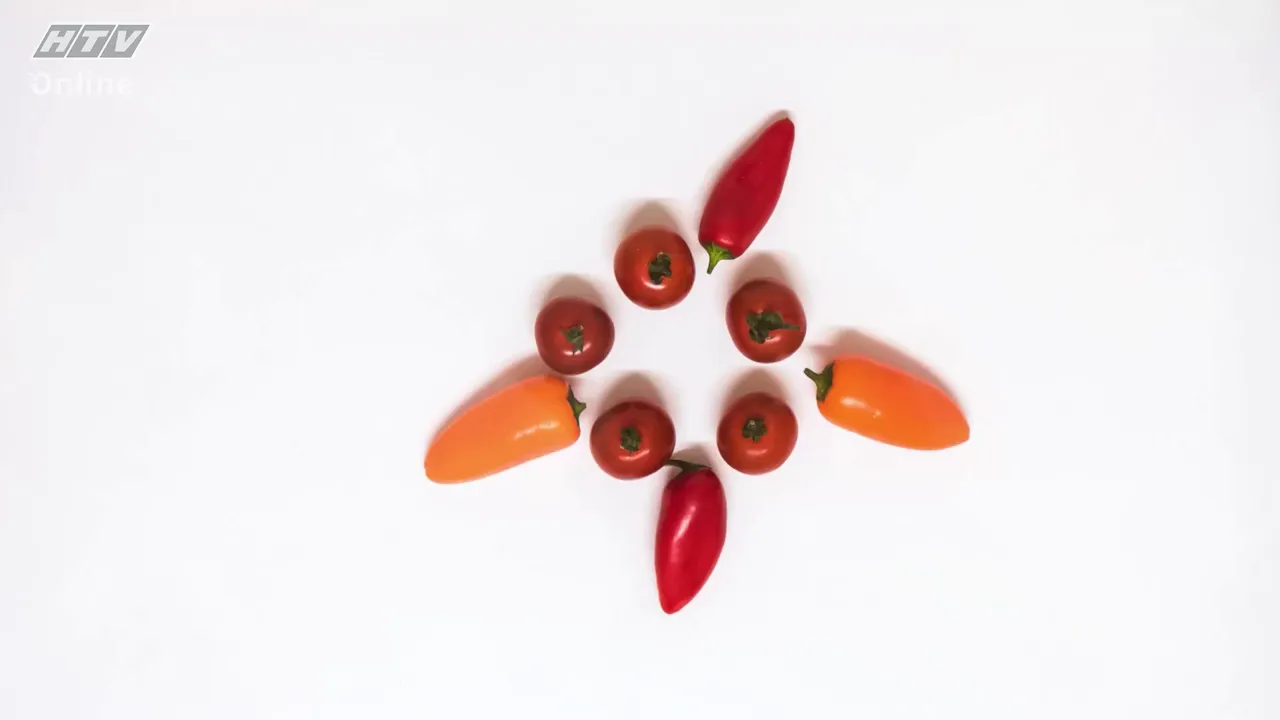

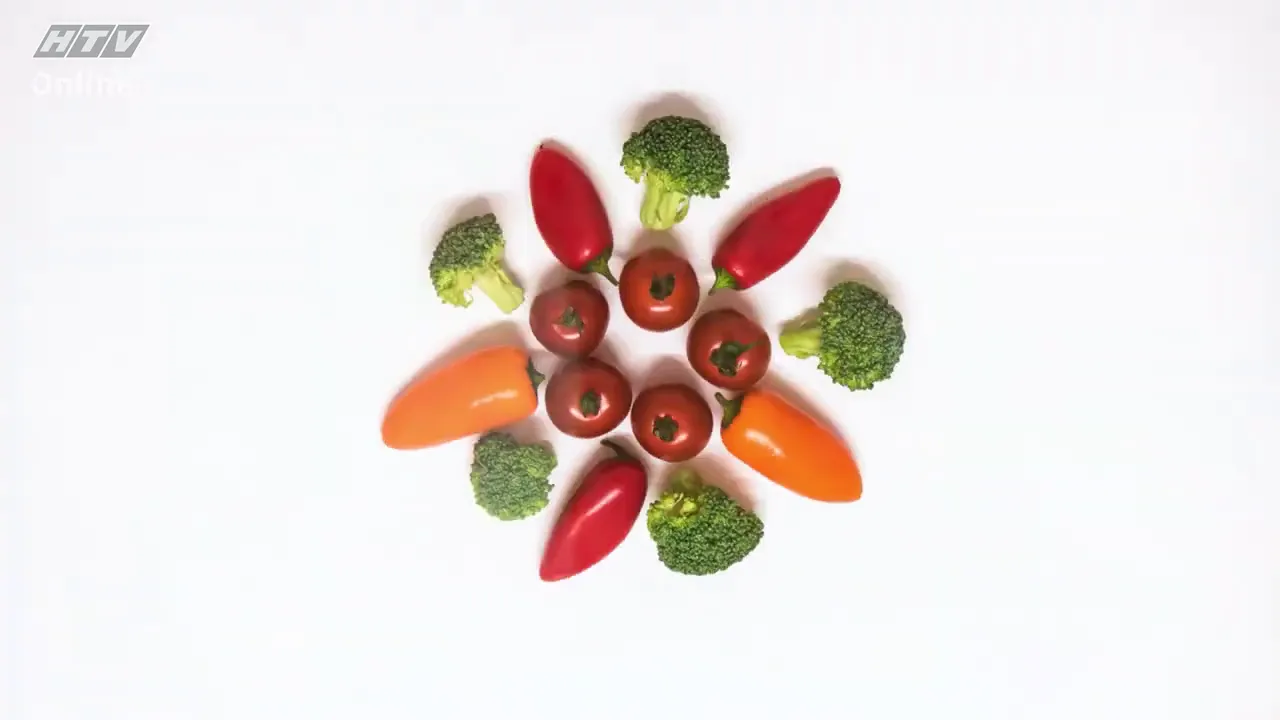

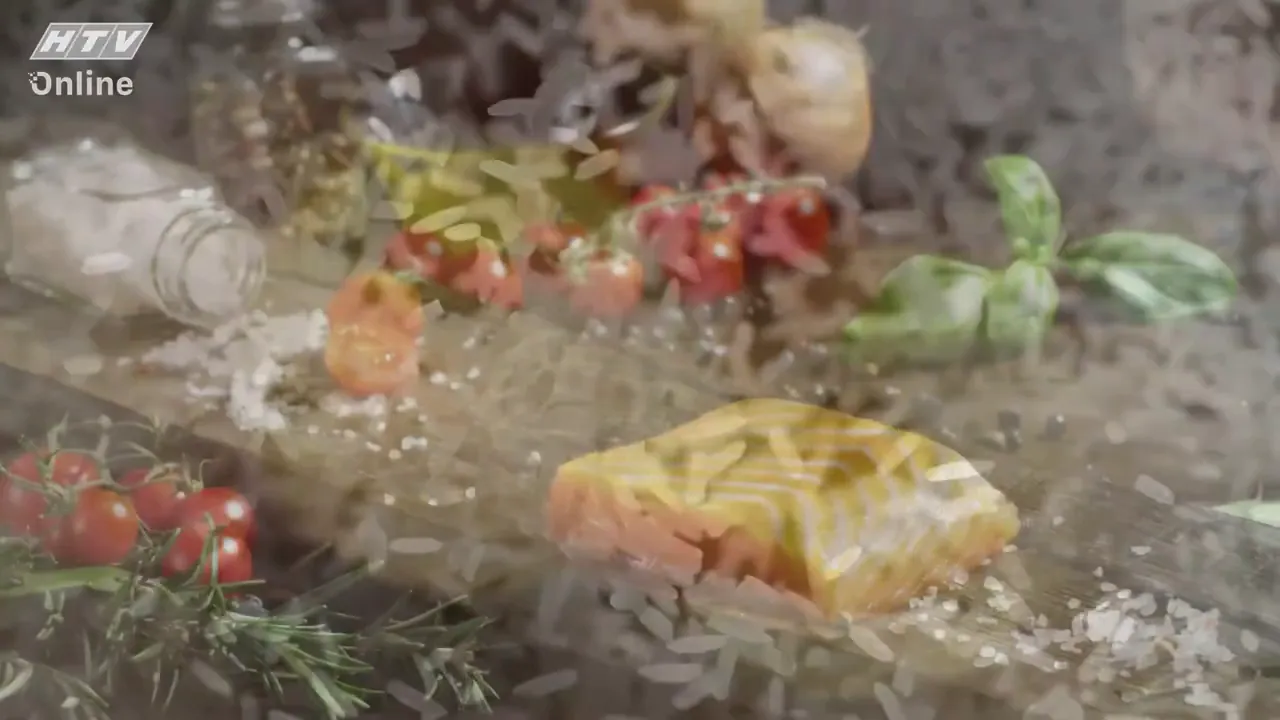

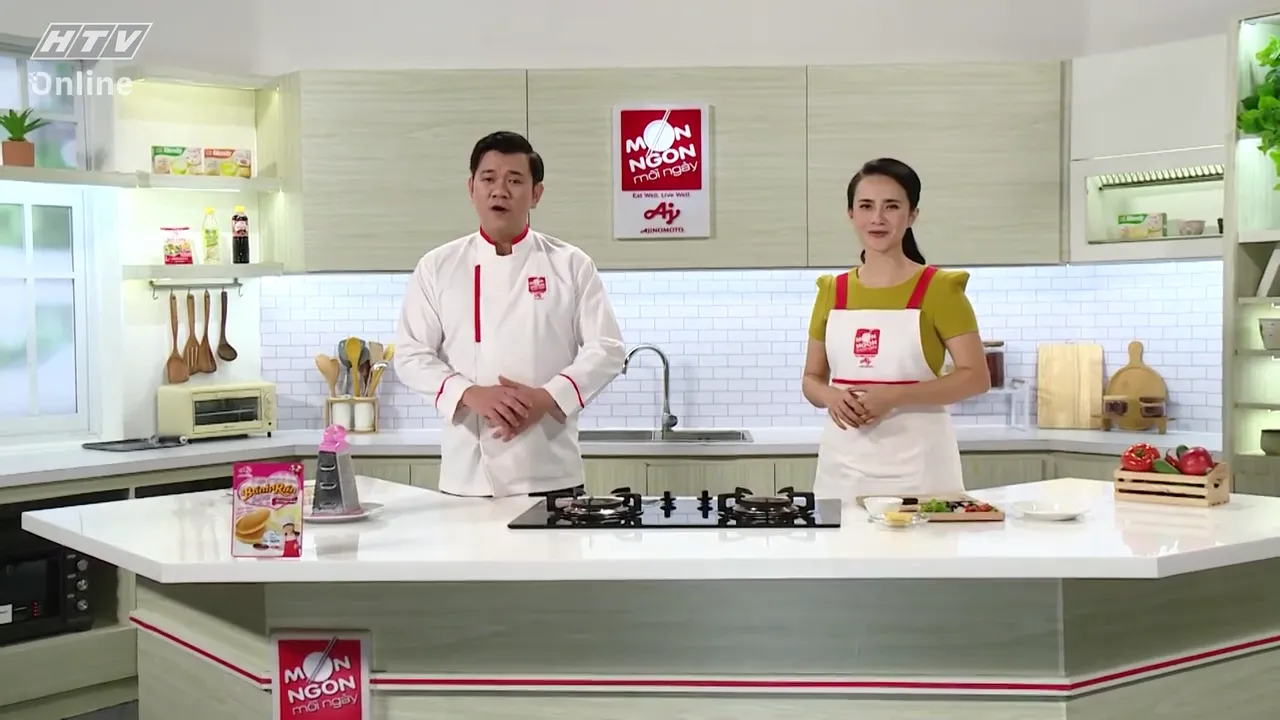

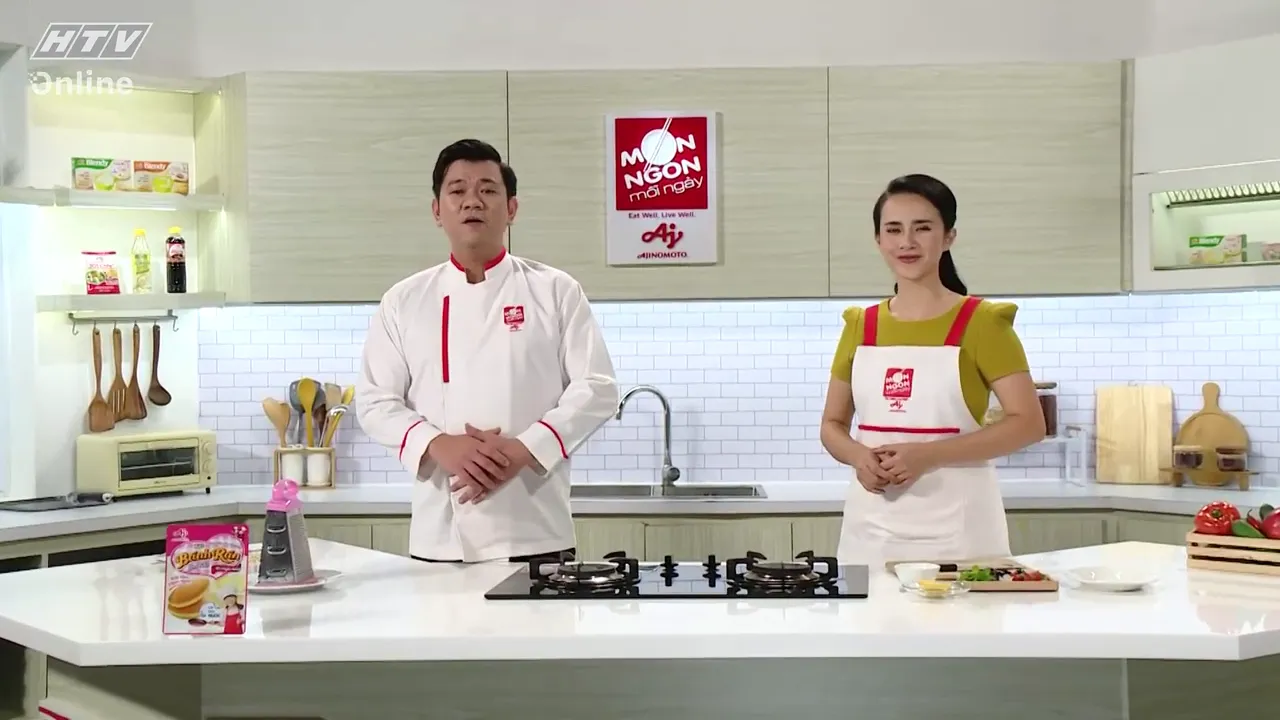

In [ ]:
for file in GCS.list_files():
    from IPython.display import display
    import PIL, requests

    url = GCS.get_file_info(file)['public_url']
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    display(image)

#### TransNetV2

In [12]:
import sys
from pathlib import Path
sys.path.append(str(Path('main_vid_cloud.ipynb').resolve().parents[1]))

from data.models.TransNetV2.inference.transnetv2 import TransNetV2
model = TransNetV2()

video_path = "..."
video_frames, single_frame_predictions, all_frame_predictions = model.predict_video(video_path)
print(f"Video frames shape: {video_frames.shape}")

[TransNetV2] Using weights from /Users/dna-tuananguyen/Downloads/Projects/HCMAI25/PixeFlow/data/models/TransNetV2/inference/transnetv2-weights/.
